In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np

# add the data folder to path (this specifies a relative path to where my data is stored)
import os, sys
sys.path.append(os.path.join(os.getcwd(), "../data"))
from data import data_utils 

In [2]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('iris')
x_train = np.hstack([np.ones(x_train.shape[0]).reshape(-1,1), x_train])
x_valid = np.hstack([np.ones(x_valid.shape[0]).reshape(-1,1), x_valid])
x_test = np.hstack([np.ones(x_test.shape[0]).reshape(-1,1), x_test])

x_train = np.vstack([x_train, x_valid])

y_train = np.vstack([y_train, y_valid])
y_train, y_test = y_train[:,(1,)], y_test[:,(1,)]




In [3]:
x_test.shape

(15, 5)

In [4]:
np.ones(19).shape

(19,)

In [5]:
y_test.shape

(15, 1)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def Probability(X, W):
    return sigmoid(np.dot(X,W))

In [8]:
W = np.zeros(5)

In [9]:
p = Probability(x_test,W)

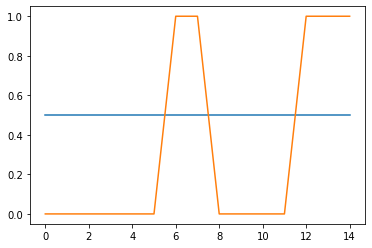

In [10]:
prediction = Probability(x_test, W)

plt.plot(prediction)
plt.plot(y_test)
plt.show()

In [11]:
def update_parameters(w, grad_w, learning_rate=1.):    
    return w + learning_rate * grad_w

def grad(x,y,w):
#     p = Probability(x, w)
#     print('shape of prob',p.shape)
#     p = y
#     print('shape of y',y.shape)
    prob = (y.reshape(-1) - Probability(x, w))
#     print(prob.shape)
    return np.dot(prob,x.reshape(1,-1))

def loss(x,y,w):
#     print('x shape',x.shape)
#     print('y shape',y.shape)
#     print('w shape',w.shape)
    
    prob = np.log(Probability(x, w).reshape(-1,1))
    a = np.dot(y.T,prob)
    b = np.dot((1-y.reshape(-1)),np.log(1 - Probability(x, w).reshape(-1)))
    return a + b

In [12]:
# W = np.zeros(5)
# gradient = grad(x_train,y_train,W)
# print(W.shape)
# print(gradient.shape)

# W = update_parameters(W,gradient)
# print(W.shape)


In [20]:
W = np.zeros(5)
losses = []
learning_rate = 0.005
for i in range(2000):   
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_train = x_train[randomize]
    y_train = y_train[randomize]
    for j in range(x_train.shape[0]):
        W_grad = grad(x_train[j],y_train[j],W)
        W = update_parameters(W, W_grad, learning_rate)
    losses.append(loss(x_train,y_train, W).reshape(-1))
        # print loss if nessessary
    if i==0 or (i+1) % 200 == 0:
        print("Iter %3d, loss = %.6f" % (i+1, loss(x_train,y_train, W)))

Iter   1, loss = -87.104462
Iter 200, loss = -66.404174
Iter 400, loss = -66.046567
Iter 600, loss = -65.900843
Iter 800, loss = -65.839831
Iter 1000, loss = -65.814083
Iter 1200, loss = -65.802892
Iter 1400, loss = -65.798724
Iter 1600, loss = -65.796538
Iter 1800, loss = -65.795745
Iter 2000, loss = -65.795414


In [21]:
def accuracy(y,ypredicted):
    count = len(y)
    correct = 0
    for i in range(0,len(y)):
        if y[i] == 0 and ypredicted[i] < .5:
            correct += 1
        elif y[i] == 1 and ypredicted[i] > .5:
            correct += 1
    return correct/count

0.7333333333333333


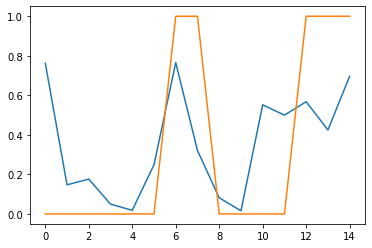

array([[-6.9324264]])

In [24]:
prediction = Probability(x_test, W)
acc = accuracy(y_test,prediction)
print(acc)
plt.plot(prediction)
plt.plot(y_test)
plt.show()

loss(x_test,y_test, W)

<function matplotlib.pyplot.show(*args, **kw)>

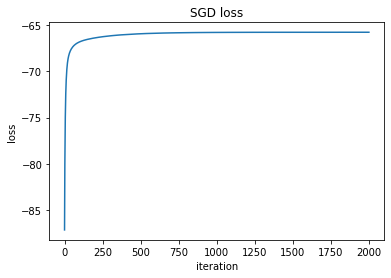

In [23]:
plt.plot(losses)
plt.title('SGD loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show

Iter   1, loss = -92.770844
Iter 200, loss = -69.124830
Iter 400, loss = -67.765458
Iter 600, loss = -67.276311
Iter 800, loss = -67.005870
Iter 1000, loss = -66.831589
Iter 1200, loss = -66.707212
Iter 1400, loss = -66.610955
Iter 1600, loss = -66.531842
Iter 1800, loss = -66.464117
Iter 2000, loss = -66.404603


<function matplotlib.pyplot.show(*args, **kw)>

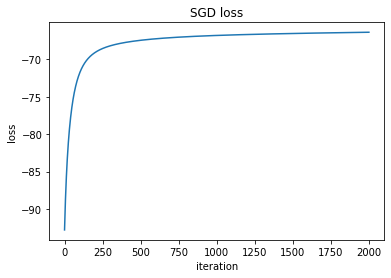

In [18]:
W = np.zeros(5)
losses = []
learning_rate = 0.0005
for i in range(2000):   
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_train = x_train[randomize]
    y_train = y_train[randomize]
    for j in range(x_train.shape[0]):
        W_grad = grad(x_train[j],y_train[j],W)
        W = update_parameters(W, W_grad, learning_rate)
    losses.append(loss(x_train,y_train, W).reshape(-1))
        # print loss if nessessary
    if i==0 or (i+1) % 200 == 0:
        print("Iter %3d, loss = %.6f" % (i+1, loss(x_train,y_train, W)))
        
plt.plot(losses)
plt.title('SGD loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show      

Iter   1, loss = -93.492692
Iter 200, loss = -82.966936
Iter 400, loss = -77.926194
Iter 600, loss = -74.994728
Iter 800, loss = -73.124063
Iter 1000, loss = -71.859415
Iter 1200, loss = -70.965852
Iter 1400, loss = -70.311039
Iter 1600, loss = -69.815992
Iter 1800, loss = -69.431465
Iter 2000, loss = -69.125569


<function matplotlib.pyplot.show(*args, **kw)>

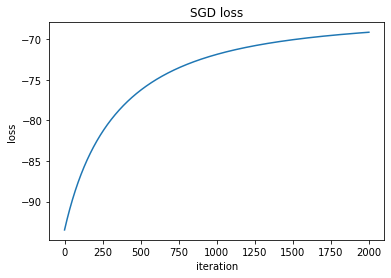

In [19]:
W = np.zeros(5)
losses = []
learning_rate = 0.00005
for i in range(2000):   
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_train = x_train[randomize]
    y_train = y_train[randomize]
    for j in range(x_train.shape[0]):
        W_grad = grad(x_train[j],y_train[j],W)
        W = update_parameters(W, W_grad, learning_rate)
    losses.append(loss(x_train,y_train, W).reshape(-1))
        # print loss if nessessary
    if i==0 or (i+1) % 200 == 0:
        print("Iter %3d, loss = %.6f" % (i+1, loss(x_train,y_train, W)))
        
plt.plot(losses)
plt.title('SGD loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show      